# NOTE that Optitype is fast, but it is also doing less - only typing HLA-I

In [1]:
import os
from os import walk

import pandas as pd
import numpy as np
import sys
import re

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_rows', 9000)
pd.set_option('display.max_columns', 1500)
pd.set_option('max_colwidth', 400)

In [5]:
resultpath = 'C:\\Users\\nikol\\OneDrive\\DTU\\11_semester\\output_full_dataset\\'

#Load performance files:
memory_use_gb_dict = dict()
cpu_time_min_dict = dict()
wall_time_min_dict = dict()


for tool in ['kourami', 'hla-la', 'optitype', 'hisatgenotype', 'stc-seq']:
    full_filepath =  resultpath + tool
    
    #Make list of results for each tool:
    memory_use_gb_dict[tool] = list()
    cpu_time_min_dict[tool] = list()
    wall_time_min_dict[tool] = list()
    
    #Reset list of filenames for each tool
    tool_files = list()

    for (dirpath, dirnames, filenames) in walk(full_filepath):
        tool_files.extend(filenames)
    
    for file in tool_files:
        #Only include logfiles
        if file.endswith('.log'):
            with open(full_filepath + '\\' + file, 'r') as infile:
                for line in infile:
                    #Grab memory use
                    if line.startswith('    resources_used.mem'):
                        line_extract = line.split()[-1][:-2]
                        
                        memory_gb = int(line_extract)/(10**6)
                        
                        memory_use_gb_dict[tool].append(memory_gb)
                    
                    #Grab cputime 
                    if line.startswith('    resources_used.cput'):
                        line_extract = line.split()[-1]
                        
                        time_min = (int(line_extract[-8:-6]) * 60) + int(line_extract[-5:-3]) + (int(line_extract[-2:]) / 60)
                        
                        cpu_time_min_dict[tool].append(time_min)
                    
                    #Grab walltime
                    if line.startswith('    resources_used.walltime'):
                        line_extract = line.split()[-1]
                        
                        time_min = (int(line_extract[-8:-6]) * 60) + int(line_extract[-5:-3]) + (int(line_extract[-2:]) / 60)
                        
                        wall_time_min_dict[tool].append(time_min)
                        

In [6]:
#Convert dicts to dataframes
memory_use_gb_df = pd.DataFrame.from_dict(memory_use_gb_dict, orient='index')
memory_use_gb_df = memory_use_gb_df.transpose()

cpu_time_min_df= pd.DataFrame.from_dict(cpu_time_min_dict, orient='index')
cpu_time_min_df = cpu_time_min_df.transpose()

wall_time_min_df = pd.DataFrame.from_dict(wall_time_min_dict, orient='index')
wall_time_min_df = wall_time_min_df.transpose()

# Violinplots

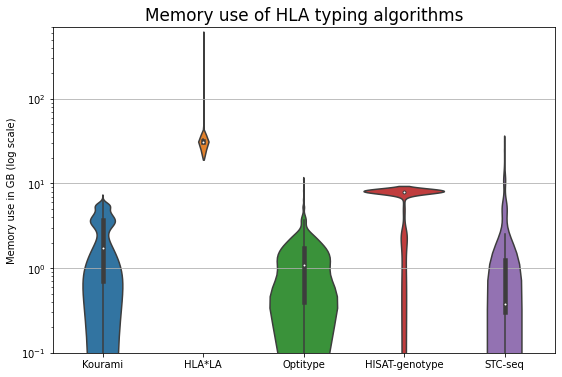

In [7]:
#Make dataframe wideformat
memory_use_wide_df = pd.melt(memory_use_gb_df, var_name='tool', value_name='memory_use_GB')

# load data into a dataframe
fontsize = 10

fig, ax = plt.subplots(figsize=(9,6))
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('tool', 'memory_use_GB', data=memory_use_wide_df, ax = ax)

plt.yscale('log')
plt.ylabel('Memory use in GB (log scale)')
plt.xlabel('')
ax.yaxis.grid()

ax.set_ylim(0.1, max(memory_use_gb_df['hla-la'])+100)

ax.set_xticklabels(['Kourami', 'HLA*LA', 'Optitype', 'HISAT-genotype', 'STC-seq'])

plt.rcParams.update({'font.size': 14})
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)


plt.title('Memory use of HLA typing algorithms')

plt.show()

In [ ]:
#Make dataframe wideformat
memory_use_wide_df = pd.melt(cpu_time_min_df, var_name='tool', value_name='memory_use_GB')

# load data into a dataframe
fontsize = 10

fig, ax = plt.subplots(figsize=(9,6))
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('tool', 'memory_use_GB', data=memory_use_wide_df, ax = ax)


plt.ylabel('CPU time in minutes (log scale)')
plt.xlabel('')
ax.yaxis.grid()

plt.yscale('log')
ax.set_ylim(1, max(cpu_time_min_df['hla-la'])+1000)

ax.set_xticklabels(['Kourami', 'HLA*LA', 'Optitype', 'HISAT-genotype', 'STC-seq'])


plt.rcParams.update({'font.size': 14})
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

plt.title('CPU time use of HLA typing algorithms')

plt.show()

In [ ]:
#Make dataframe wideformat
memory_use_wide_df = pd.melt(wall_time_min_df, var_name='tool', value_name='memory_use_GB')

# load data into a dataframe
fontsize = 10

fig, ax = plt.subplots(figsize=(12,6))
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('tool', 'memory_use_GB', data=memory_use_wide_df, ax = ax)

plt.yscale('log')
plt.ylabel('Walltime (min)')
plt.xlabel('')
ax.yaxis.grid()

ax.set_ylim(0.1, max(wall_time_min_df['hla-la'])+1000)

plt.show()

# Non log violinplots

In [ ]:
#Make dataframe wideformat
memory_use_wide_df = pd.melt(memory_use_gb_df, var_name='tool', value_name='memory_use_GB')

# load data into a dataframe
fontsize = 10

fig, ax = plt.subplots(figsize=(9,6))
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('tool', 'memory_use_GB', data=memory_use_wide_df, ax = ax)

#plt.yscale('log')
plt.ylabel('Memory use (GB)')
plt.xlabel('')
ax.yaxis.grid()

ax.set_ylim(0.1, np.mean(memory_use_gb_df['hla-la'])+5)

plt.show()

In [ ]:
#Make dataframe wideformat
memory_use_wide_df = pd.melt(cpu_time_min_df, var_name='tool', value_name='memory_use_GB')

# load data into a dataframe
fontsize = 10

fig, ax = plt.subplots(figsize=(12,6))
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('tool', 'memory_use_GB', data=memory_use_wide_df, ax = ax)


plt.ylabel('CPU time (min)')
plt.xlabel('')
ax.yaxis.grid()

#plt.yscale('log')
ax.set_ylim(0.1, np.mean(cpu_time_min_df['hla-la'])+10)

plt.show()

In [ ]:
#Make dataframe wideformat
memory_use_wide_df = pd.melt(wall_time_min_df, var_name='tool', value_name='memory_use_GB')

# load data into a dataframe
fontsize = 10

fig, ax = plt.subplots(figsize=(12,6))
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('tool', 'memory_use_GB', data=memory_use_wide_df, ax = ax)

#plt.yscale('log')
plt.ylabel('Walltime (min)')
plt.xlabel('')
ax.yaxis.grid()

ax.set_ylim(0, np.mean(wall_time_min_df['hla-la']))

plt.show()

# Boxplots

In [ ]:
fig = plt.figure(figsize =(10, 7)) 

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_ylim(0.02, max(memory_use_gb_df['hla-la'])+500)

plt.yscale('log')
plt.ylabel('Memory use (Gb)')

memory_use_gb_df.boxplot()

In [ ]:
fig = plt.figure(figsize =(10, 7)) 

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_ylim(0.05, max(cpu_time_min_df['hla-la'])+500)

plt.yscale('log')
plt.ylabel('CPU time (min)')

cpu_time_min_df.boxplot()

In [ ]:
fig = plt.figure(figsize =(10, 7)) 

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_ylim(0.02, max(wall_time_min_df['hla-la'])+500)

plt.yscale('log')
plt.ylabel('Walltime (min)')

wall_time_min_df.boxplot()

In [ ]:
for df in [memory_use_gb_df, cpu_time_min_df, wall_time_min_df]:

    mean_values = df.mean()

    std_values = df.std()

    plt.bar(range(len(df.columns)), mean_values, 
            yerr=std_values, align='center', alpha=0.5, color = '#0000FF')

    plt.xticks(range(len(df.columns)), df.columns, rotation = 45)
    plt.ylabel('memory(gb) / time(min)')
    plt.title('Time and Memory use')
    plt.show()

# Old code

In [ ]:
exon_1 = 'AGA GTC TCC TCA GAC GCC GAG ATG CTG GTC ATG GCG CCC CGA ACC GTC CTC CTG CTG CTC TCG GCG GCC CTG GCC CTG ACC GAG ACC TGG GCC G'

In [ ]:
len(exon_1)

In [ ]:
len('ATG CTGGTCATGGCGCCCCGAACCGTCCTCCTGCTGCTCTCGGCGGCCCTGGCCCTGACCGAGACCTGGGCCG')

In [ ]:
cpu_time_min_dict

In [ ]:
np.sum(cpu_time_min_dict['kourami'])

In [ ]:
total_cpu_time = 0
for tool in cpu_time_min_dict:
    total_cpu_time += np.sum(cpu_time_min_dict[tool])

In [ ]:
total_cpu_time / 60

In [ ]:
total_cpu_time